# TERA - DSCSP - Aula 27
## Clustering

Objetivos gerais de algoritmos de clustering:
- Análise exploratória dos dados
- Encontrar padrões e estruturas
- Agrupar dados de forma a criar representações sumarizadas (sumarização de dados)

### Exemplo
Encontrar clusters utilizando medidas de diâmetro e massa de 400 moedas dos EUA.

Dataset:
- `diametro` (float): Diâmetro da moeda em milímetros
- `massa` (float): Massa da moeda em gramas
- `modelo_real` (string): Nome real da moeda (vamos assumir que não conhecemos, por enquanto)

In [1]:
# Imports usados no curso
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
# Pasta contendo os dados:
DATASET_FOLDER = '../datasets/'

In [3]:
# Leitura dos dados das moedas dos EUA
df_coin = pd.read_csv(os.path.join(DATASET_FOLDER, 'us_coins_dataset.csv'), sep=';')

df_coin.head(5)

,massa,diametro,modelo_real
0,4.665618,20.780848,5
1,2.538830,19.156918,1
2,4.500314,20.878869,5
3,2.283612,18.195932,10
4,5.051659,25.258851,25


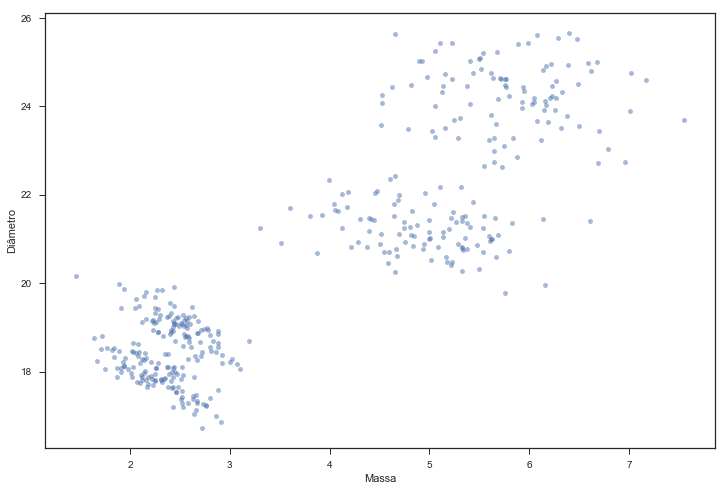

In [4]:
# Vamos plotar o gráfico das moedas
df_coin.plot.scatter(x='massa',y='diametro', alpha=0.5)
plt.xlabel('Massa')
plt.ylabel('Diâmetro')
plt.show()

Podemos ver que há a presença de grupos. Quantos grupos você vê? Talvez entre 3 e 4 clusters?

Vamos usar o algoritmo de clustering chamado de [**K-Means**](https://en.wikipedia.org/wiki/K-means_clustering) para tentar encontrar esses clusters.

## K-Means

O algoritmo K-Means procura encontrar iterativamente um número fixo *k* de partições (clusters) dado um conjunto *n* de observações. Essas partições são definidas por um valor central, que é chamado de *centroide*. Esse valor central normalmente é calculado utilizando a posição média das observações que compõem um dado cluster. Esse centroide pode ser visto como um *centro de massa* dos dados daquele cluster. O algoritmo necessita que se escolha antecipadamente o número *k* de clusters que desejam ser encontrados. A partir dessa escolha, o algoritmo iterativamente tenta encontrar os centroides que melhor separam os dados nos *k* clusters até não haver mais variação.

Vamos tentar encontrar esses clusters, então!

In [5]:
# Primeiro importamos o K-Means do scikit-learn
from sklearn.cluster import KMeans

# Precisamos criar a instância do KMeans com o número de clusters que desejamos encontrar
# Vamos escolher k=4
kmeans = KMeans(n_clusters=4)

# Transformar dataframe em numpy array
xy = df_coin[['massa','diametro']].values

# Calcular resultado e criar clusteres
results = kmeans.fit_predict(xy)

In [6]:
# Vamos criar uma coluna para os resultados
df_coin['cluster'] = results

df_coin[['massa','diametro','cluster']].head(5)

,massa,diametro,cluster
0,4.665618,20.780848,2
1,2.538830,19.156918,0
2,4.500314,20.878869,2
3,2.283612,18.195932,3
4,5.051659,25.258851,1


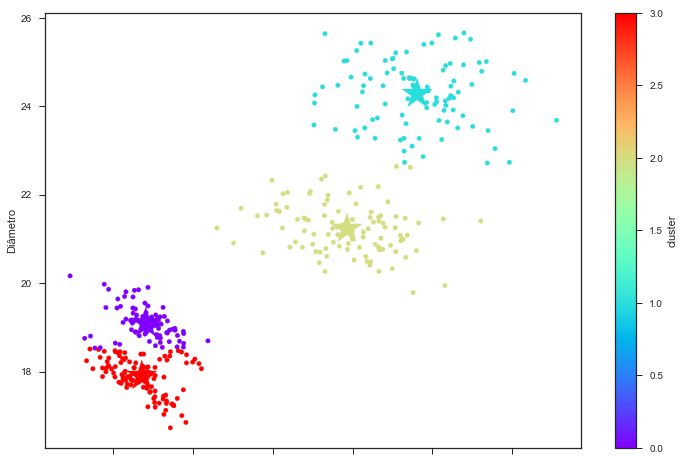

In [7]:
# E agora plotamos o resultado
df_coin.plot.scatter(x='massa', y='diametro', c='cluster', cmap='rainbow')
plt.xlabel('Massa')
plt.ylabel('Diâmetro')
# Centroides
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], 
            marker='*', c=range(len(kmeans.cluster_centers_)), cmap='rainbow',
            s=1000)
plt.show()

Percebemos que o algoritmo encontrou clusters bem separados. Entretanto, percebemos que os clusters 0 (preto) e 1 (amarelo) possuem alguns problemas de intersecção que podemos não concordar. 

Vamos plotar a distribuição real dos modelos de moedas.

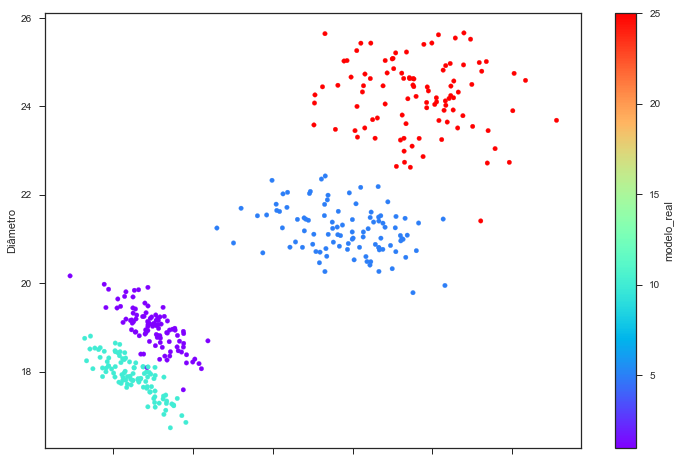

In [8]:
df_coin.plot.scatter(x='massa', y='diametro', c='modelo_real', cmap='rainbow')
plt.xlabel('Massa')
plt.ylabel('Diâmetro')
plt.show()

Vamos tentar verificar como os clusters gerados representam os modelos reais de moedas utilizando a tabulação cruzada (cross-tabulation). 

In [9]:
ct = pd.crosstab(df_coin['cluster'], df_coin['modelo_real'])
print(ct)

modelo_real  1    5   10  25
cluster                     
0            83    0   6   0
1             0    0   0  97
2             0  100   0   3
3            17    0  94   0


As colunas da matriz de tabulação cruzada representam os modelos reais das moedas, enquanto as linhas representam os rótulos gerados pelo K-Means. Podemos perceber que 83% das moedas de 1 cent estão incorporadas no cluster 1, enquanto que o restante está no cluster 3. Todas as moedas de 5 cents estão incluídas no cluster 0. 95% das moedas de 10 cents estão no cluster 3 e 97% das moedas de 25 cents estão no cluster 2.

Apesar de não gerar os clusters perfeitos, o algoritmo teve sucesso ao encontrar bons clusters para as moedas.

---
### Exercício prático K-Means

Vamos praticar agora!
Utilizaremos o clássico dataset Iris para treinar o método K-Means. O dataset contém os seguintes atributos:

- `sepal_length`: Comprimento da sépala da flor
- `sepal_width`: Largura da sépala
- `petal_length`: Comprimento da pétala
- `petal_width`: Largura da pétala
- `species`: Espécie da flor

![iris](https://cdn-images-1.medium.com/max/1600/1*1q79O5DCx_XNrAARXSFzpg.png)

In [10]:
# Importe o módulo de datasets do seaborn (já está em dataframe do pandas)
df = sns.load_dataset("iris")

df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Como temos um vetor de features de 4 dimensões, não faz sentido tentarmos visualizar todas as dimensões em uma só figura. Entretanto, podemos visualizar a relação entre cada uma de suas features através de um mapa de dispersão pareado.

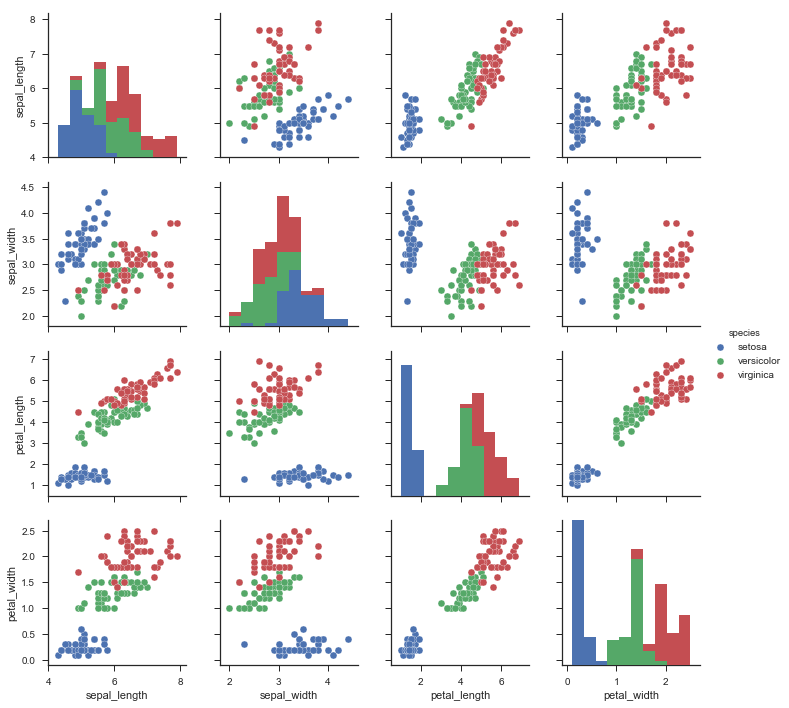

In [11]:
# Scatter plot pareado utilizando o Seaborn
sns.pairplot(df, hue="species")

Podemos perceber que há uma boa separação de clusters utilizando as features `petal_length` e `petal_width`. Podemos utilizar apenas essas dimensões para a nossa análise.

In [12]:
# TODO
# Separe o dataset utilizando apenas as features `petal_length` e `petal_width` do dataframe
# Coloque essas colunas em um numpy array (dica: utilize o atributo df[...].values)
X = _

In [ ]:
# Plot dos dados
plt.scatter(x=X[:,0],y=X[:,1])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

Além de já sabermos que existem 3 espécies de plantas, nós também podemos perceber que há entre 2 e 3 clusters pelo gráfico de dispersão. Vamos utilizar o K-Means para achar esses clusters.

In [90]:
# TODO
# Importe o módulo do KMeans 


# Crie uma instância do K-Means pelo sklearn
kmeans = _


In [94]:
# TODO
# Treine e aplique o modelo KMeans para o dataset X
# (dica: utilize o método fit_predict do sklearn)
results = _


In [ ]:
# Crie uma coluna no dataframe df para incluir os resultados
_

df.head(5)

In [ ]:
# Plote o mapa de dispersão (scatter plot) dos clusters gerados
# Veja o exemplo das moedas para se inspirar
_

Os clusters formados fazem sentido? Veja novamente o gráfico da separação das espécies para ver se os clusters têm relação com elas.

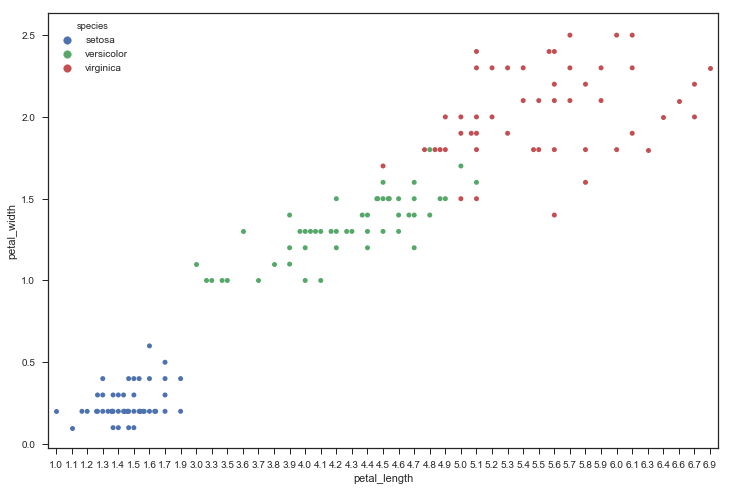

In [13]:
sns.swarmplot(data=df, x='petal_length', y='petal_width', hue="species")
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

Podemos também utilizar a matriz de tabulação cruzada para verificar a relação dos clusters com as espécies.

In [ ]:
# Apresente a matriz de cross-tabulation (Veja o exemplo das moedas)
_


Quais são as conclusões?

#### Como escolher o número de clusters?

Até agora escolhemos o número de clusters ao analisarmos o gráfico de dispersão dos dados. Mas, será que escolhemos o melhor número de clusters? Um método usual é utilizar o que é chamado de "elbow plot" ou "inertia plot". A "inércia" de um cluster nada mais é do que o seu grau de dispersão em relação ao centroide. Quanto maior a inércia, mais disperso é o cluster e, portanto, não temos bons clusters. Entretanto, para diminuirmos o valor da inércia, precisamos aumentar o número de clusters, o que não é necessariamente bom. Precisamos achar um equilíbrio!

Vamos achar quais são os valores de inércia para diversos números de clusters (k) utilizando o dataset de moedas dos EUA.

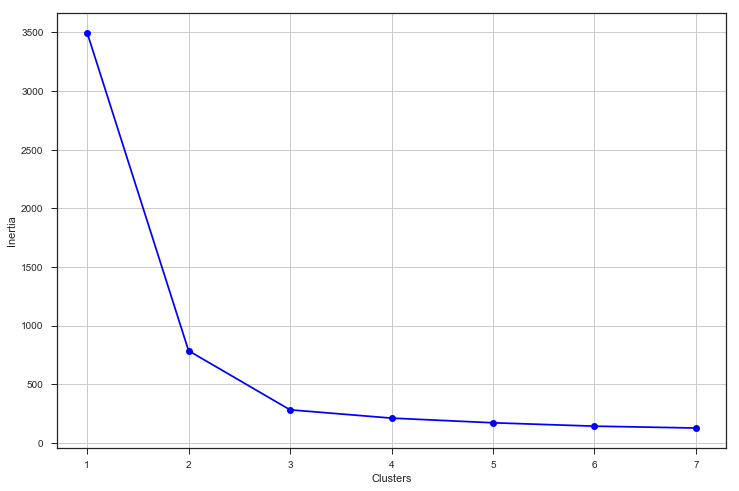

In [14]:
# Importe o KMeans
from sklearn.cluster import KMeans

# Crie o dataframe
df_coin = pd.read_csv(os.path.join(DATASET_FOLDER, 'us_coins_dataset.csv'), sep=';')

# Vamos gerar os dados a partir do dataframe
xy = df_coin[['massa','diametro']].values

# Range de valores de clusters que vamos testar
k = range(1,8,1)

# Lista de inércias
inertias = []

# Para cada valor de k, ache a inércia
for i in k:
    # crie a instância
    kmeans = KMeans(n_clusters=i)

    # Treine o modelo
    model = kmeans.fit(xy)

    # Ache a inercia dos clusters
    inertias.append(model.inertia_)
    
plt.plot(k, inertias, '-ob')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Podemos ver que o valor da inércia decresce rapidamente até *k*=3, mas depois decresce lentamente. Uma regra usual para a escolha do número de clusters é pegar exatamente esse valor de mudança de inclinação mais acentuada. De fato, ao escolhermos 3 clusters para o dataset de moedas dos EUA, nós poderíamos encontrar clusters bem separados. Entretanto, ao analisarmos o gráfico de dispersão, nós percebemos que poderia haver mais um cluster. Isso mostra que não existe uma regra geral para a escolha do número ideal de clusters.

## Hierarchical Clustering

Vamos agora aprender sobre outro método de clustering: [**Hierarchical Clustering**](https://en.wikipedia.org/wiki/Hierarchical_clustering). Como o nome mesmo diz, ele utiliza o conceito de *hierarquia* para construir os clusters. Existem duas principais variações do algoritmo: aglomerativo e por divisão. O primeiro é mais usado na prática. O passo a passo do algoritmo é apresentado abaixo:

- Primeiro colocamos todos as observações em clusters próprios;
- Depois, iterativamente procuramos os clusters mais próximos\* e agrupamos eles em um novo cluster;
- Repetimos o passo anterior até formarmos um único cluster com todas as observações.

\*Obs: A definição de distância (ou similaridade) entre clusters depende do tipo de métrica de distância (Euclidiana, Manhattan, cosseno etc) e ligação (Ward, simples, completa etc).

Como podemos ver no algoritmo, o objetivo é a criação de um grande cluster que agrupe todos os dados. Nós podemos visualizar esse histório de agrupamentos a partir de um [dendrograma](https://en.wikipedia.org/wiki/Dendrogram). A então criação de clusters mais granulares depende da região de similaridade que se deseja realizar o corte.

Vamos utilizar o dataset de diferentes tipos de grãos de trigo obtidos pelo [UCI](https://archive.ics.uci.edu/ml/datasets/seeds#) para treinar esses conceitos.

O dataset contém os seguintes parâmetros:

- `area`: Área total do grão, A
- `perimeter`: Perímetro do grão, P
- `compactness`: Grão de compactação do grão - $C = \frac{4 \pi A}{P^2}$
- `length_kernel`: Comprimento do núcleo
- `width_kernel`: Largura do núcleo
- `asymmetry`: Coeficiente de assimetria
- `kernel_groove`: Comprimento do sulco do núcleo

Variedades de grãos: 'Kama' (1), 'Rosa' (2) e 'Canadian' (3)

In [15]:
# Importar os dados
df_grain = pd.read_csv(os.path.join(DATASET_FOLDER, 'seeds_dataset.csv'), sep=';')
df_grain.head(5)

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry,kernel_groove,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


Antes de iniciarmos o processo de clustering, vamos verificar se há muita discrepância entre as variâncias das features. Essa etapa é muito importante, porque features com variância elevada possuem maior influência na medida de distância do algoritmo do que features com menor variância, o que pode ser indesejado. Quando normalizamos as features, nós conseguimos dar influências iguais para todas elas.

In [16]:
df_grain.var()

area             8.466351
perimeter        1.705528
compactness      0.000558
length_kernel    0.196305
width_kernel     0.142668
asymmetry        2.260684
kernel_groove    0.241553
dtype: float64

Percebemos que o atributo `area` possui maior variância, enquanto o `compactness` possui baixa variância. Portanto, vamos primeiramente normalizar as features utilizando o [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) do scikit-learn. Ele normaliza as features individualmente deixando a variância delas igual a 1.

In [17]:
# Vamos importar o StandardScaler
from sklearn.preprocessing import StandardScaler

In [18]:
# Vamos criar agora o vetor de atributos
X = df_grain[['area','perimeter','compactness','length_kernel','width_kernel','asymmetry','kernel_groove']].values

In [19]:
# Agora precisamos normalizar o vetor de features

# Primeiro criamos uma instância do StandardScaler
normalizer = StandardScaler()

# Agora podemos normalizar através do método fit_transform
X_norm = normalizer.fit_transform(X)

# Podemos verificar que a variância de cada feature é 1
np.var(X_norm, axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])

O scikit-learn possui um método próprio para o algoritmo de [Hierarchical Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering). Entretanto, ele não nos permite visualizar facilmente o dendrograma final. Por esse modo, vamos utilizar a versão do scipy.

In [20]:
# Importe os métodos linkage (Hierarchical Clustering) e dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

In [21]:
# Agora começa a brincadeira!
# Vamos escolher a métrica de distância:
distance = 'euclidean'
# Agora o tipo de ligação
linkage_type = 'complete'

# Vamos aplicar o método linkage
Y = linkage(X_norm, method=linkage_type, metric=distance)

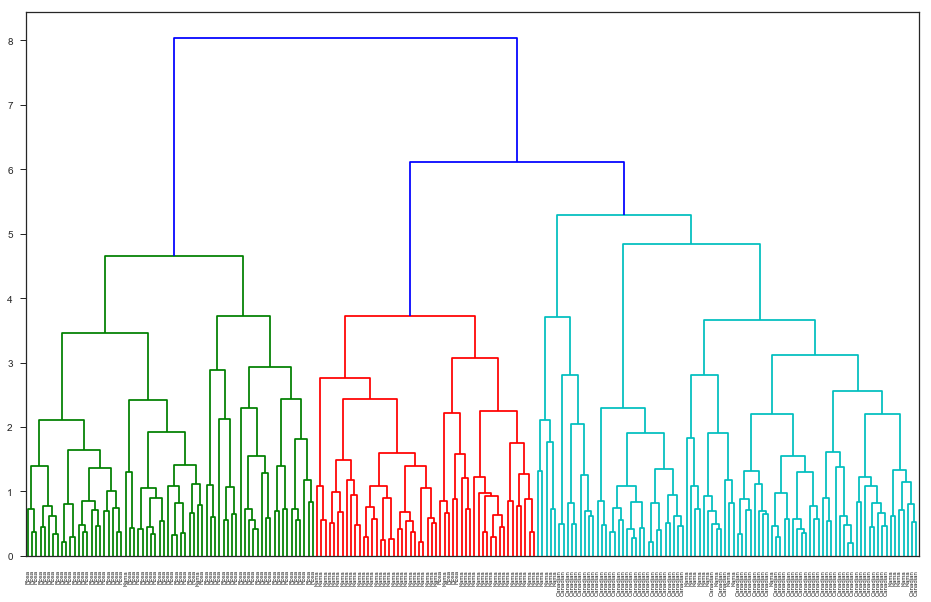

In [22]:
# Agora estamos prontos para plotar o dendrograma
# Vamos obter o nome das variedades dos grãos
varieties = df_grain['varieties'].values

# Construímos finalmente o dendrograma
plt.figure(figsize=(16,10))
dendrogram(Y,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

Podemos notar que os clusters formados a partir do Hierarchical Clustering fazem bastante sentido com relação às variedades dos grãos de trigo. Vamos realizar agora um corte no dendrograma de forma a ficarmos com apenas 3 clusters, que representa uma distância de 6.

Para essa tarefa nós podemos usar o método [`fcluster`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.fcluster.html) do scipy. Ele nos permite realizar um corte na árvore de clustering gerada pelo Hierarchical Clustering.

In [23]:
from scipy.cluster.hierarchy import fcluster

In [24]:
# Vamos gerar os rótulos para os clustes
num_clusters = 3
labels = fcluster(Y, num_clusters ,criterion='maxclust')

In [25]:
# Vamos agora criar um dataframe para podermos utilizar o cross-tabulation do pandas
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Crie a matriz de tabulação cruzada
ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)

varieties  Canadian  Kama  Rosa
labels                         
1                 0     2    66
2                 0    48     4
3                70    20     0


Podemos notar que o as variedades Canadian e Rosa foram muito bem agrupados nos clusters, mas a Kama não teve o mesmo sucesso. Vamos tentar utilizar o método "Ward" para a ligação e ver se há alguma variação.

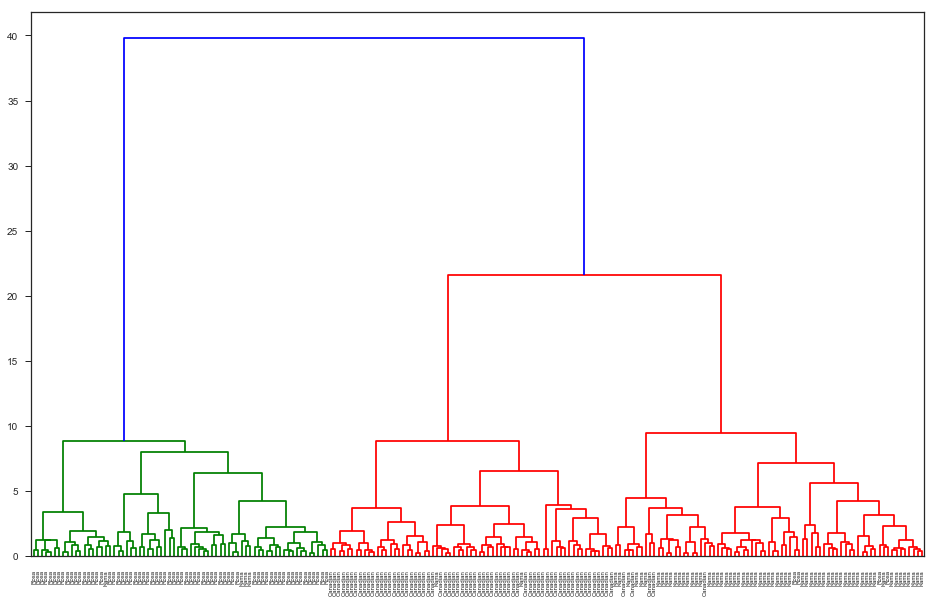

varieties  Canadian  Kama  Rosa
labels                         
1                 0     4    66
2                65     2     0
3                 5    64     4


In [26]:
# Distância
distance = 'euclidean'
# Ligação
linkage_type = 'ward'

# Treinar modelo Hierarchical Clustering
Y = linkage(X_norm, method=linkage_type, metric=distance)

# Plota dendrograma
plt.figure(figsize=(16,10))
dendrogram(Y,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

# Número de clusters
num_clusters = 3

# Obtem labels
labels = fcluster(Y, num_clusters ,criterion='maxclust')

# Vamos agora criar um dataframe para podermos utilizar o cross-tabulation do pandas
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Crie a matriz de tabulação cruzada
ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)

Agora temos um resultado melhor para a variedade Kama, mas piorou um pouco o resultado para a Canadian. Dificilmente teremos um algoritmo que consegue ser perfeito em todos os casos. Mas, como podemos visualizar no dendrograma e na matriz de tabulação cruzada, nós conseguimos um bom resultado de clusterização.

---
### Exercício prático Hierarchical Clustering

Vamos praticar agora!
Utilizaremos o dataset do [Eurovision de 2016](https://eurovision.tv/history/full-split-results) para essa tarefa. Esse evento é uma competição de músicas entre países. Cada país participante seleciona uma música para concorrer com as outras. Ao final, cada país deve votar nas músicas com pontuações entre [1,2,3,4,5,6,7,8,10,12]. Um país pode votar tanto através de um juri formado oficialmente pelo país ou via votos por telefone. Ao final, ganha o país que receber a maior quantidade de pontos.

Essa competição é famosa por apresentar um comportamento indesejado: os países próximos geografica e culturalmente tendem a se favorecer. Por essa razão há sempre mudanças nas regras para tentar evitar que isso aconteça. Será que conseguiremos perceber esse comportamento através de um algoritmo de clustering? Vamos tentar!

Um país não pode votar em si próprio, mas, para podermos fazer a nossa análise, considerei que um país daria a pontuação máxima (12) para ele próprio.

As colunas do dataset são descritas a seguir e consideramos apenas votos feitos por telefone:

- `From country`: País votante
- `Televote Points`: Pontuação dada por telefone pelo país votante
- `To country`: País que recebeu a pontuação do país votante

![Eurovision](https://www.eurovisionary.com/wp-content/uploads/2015/11/eurovision-2016.jpg)

In [27]:
# Vamos iniciar a leitura do dataset
df_euro = pd.read_csv(os.path.join(DATASET_FOLDER, 'eurovision_dataset.csv'), sep=';')

df_euro.head(5)

,From country,Televote Points,To country
0,Albania,2.0,Armenia
1,Albania,12.0,Australia
2,Albania,0.0,Austria
3,Albania,0.0,Azerbaijan
4,Albania,0.0,Belgium


In [28]:
# Podemos visualizar quem está ganhando nessa votação
df_euro_points = df_euro.groupby(['To country']).sum()
df_euro_points.sort_values(by='Televote Points', inplace=True, ascending=False)
df_euro_points.head(10)

,Televote Points
To country,
Russia,373.0
Ukraine,335.0
Poland,234.0
Australia,203.0
Bulgaria,192.0
Sweden,151.0
Armenia,146.0
Austria,132.0
France,121.0


Se formos considerar apenas os votos por telefone, a Russia está ganhando a competição!

Como fizemos para o exercício anterior, nós temos que tomar cuidado com a distribuição dos dados. como temos valores discretos e determinísticos de pontuação, não faz sentido analisarmos a variância dos dados. Entretanto, podemos normalizar os pontos em uma escala de 0-100%.

In [259]:
# Obtenha o vetor de pontos
X = np.array([i for i in df_euro.groupby('From country')['Televote Points'].apply(np.array)])

# TODO
# Realize a normalização dos dados
# Dica: Procure por MaxAbsScaler no scikit-learn
X_norm = _

Vamos realizar agora o algoritmo Hierarchical Clustering!

In [ ]:
# TODO
# Aplique o algoritmo Hierarchical Clustering utilizando o scipy
# Selecione uma métrica de distância e um método de ligação
# Teste vários para obter a intuição por trás de cada método
Y = _

In [270]:
# TODO
# Crie o dendrograma para visualizar os resultados
# Será necessário obter os valores de labels que são os países
# *votantes* da competição (Dica: Procure pelo método unique do pandas)
plt.figure(figsize=(16,10))

_ # Use o leaf_font_size = 14

plt.show()

O que podemos dizer sobre o dendrograma? Há alguma relação cultural ou geográfica entre os países? Se quiséssemos escolher uma região de corte para formar clusters intermediários, qual seria?

---
## Comparação métodos clustering:
### K-Means x Hierarchical Clustering x DBSCAN

Vamos testar os 3 algoritmos utilizando alguns datasets padrão do scikit-learn.

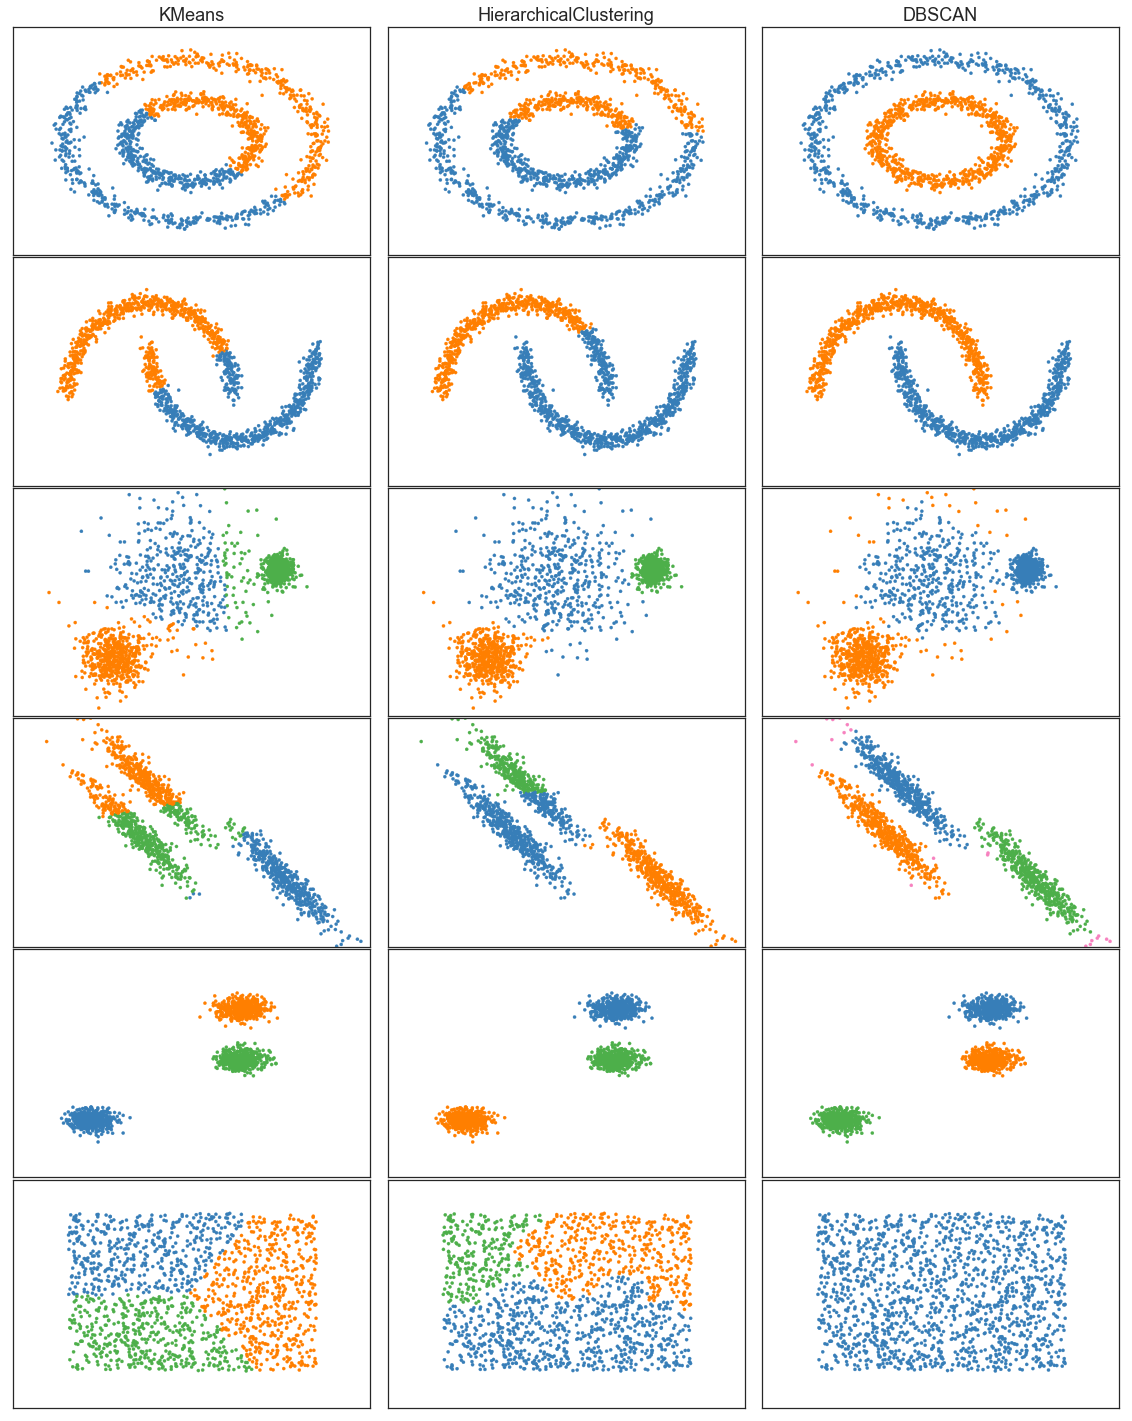

In [30]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Gera os dados
# ============
n_samples = 1500
# Circulos concentricos
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Formato de lua
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
# Bolas
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# Sem estrutura (uniforme)
no_structure = np.random.rand(n_samples, 2), None

# Dados distribuídos anisotropicamente
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Ajusta os parametros dos modelos e datasets
# ============
plt.figure(figsize=(16, 20))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

# Parametros dos modelos de clustering
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

# Parametros do dataset
datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # Atualiza os parametros para o dataset especifico
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # Normaliza o dataset
    X = StandardScaler().fit_transform(X)

    # ============
    # Criação dos objetos de clustering
    # ============
    
    # K-Means
    two_means = cluster.KMeans(n_clusters=params['n_clusters'])
    
    # DBSCAN
    dbscan = cluster.DBSCAN(eps=params['eps'])
    
    # Hierarchical Clustering - Aglomerativo
    ward = cluster.AgglomerativeClustering(
        linkage="ward",
        n_clusters=params['n_clusters'])

    clustering_algorithms = (
        ('KMeans', two_means),
        ('HierarchicalClustering', ward),
        ('DBSCAN', dbscan),
    )

    for name, algorithm in clustering_algorithms:
        algorithm.fit(X)

        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.show()

---
## Principal Component Analysis (PCA)

O [PCA](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais) é um dos algoritmos mais importantes em machine learning. Ele não só permite o cientista de dados visualizar melhor as relações entre os atributos (análise exploratória), mas também consegue reduzir o número de dimensões do problema.

Vamos testar o algoritmo no dataset de espécies de Iris.

In [31]:
# Importe o dataset
from sklearn.datasets import load_iris

iris = load_iris()

O PCA realiza 4 passos fundamentais para transformar o espaço de atributos e achar os componentes princiais:

1. Remove a média amostral
2. Rotaciona os eixos para descorrelacionar os dados
3. Ordena os componentes principais por nível de variância (importância)
4. Elimina os componentes menos variantes (Opcional - redução de dimensionalidade)

In [52]:
# Vamos agora importar o método PCA do scikit-learn
from sklearn.decomposition import PCA

# Criemos agora a instância PCA
# Não definimos o número de features: não realiza passo 4
pca = PCA()

# Aplica a transformação
X_pca = pca.fit_transform(iris.data)

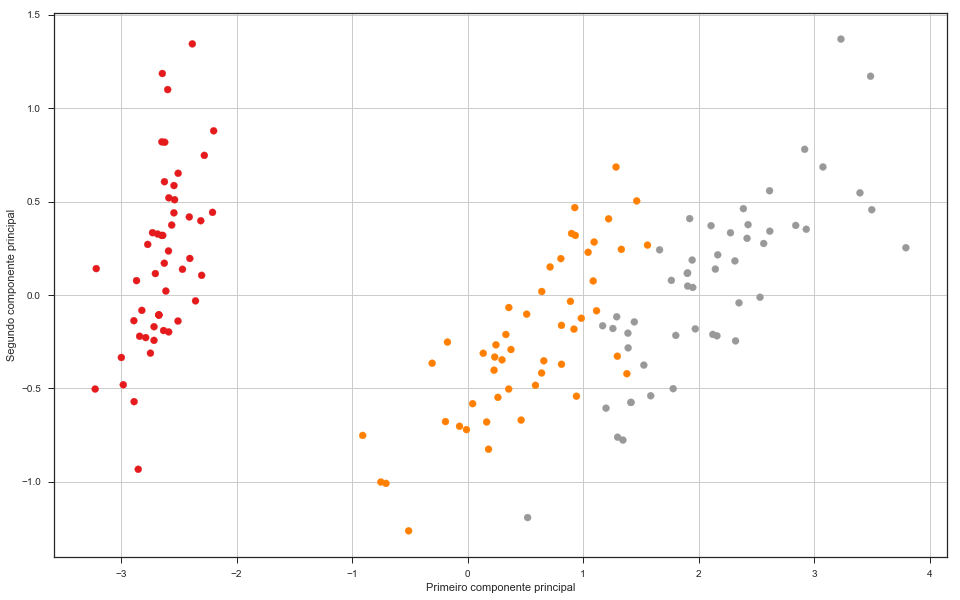

In [53]:
# Vamos plotar os resultados dos dois primeiros componentes
plt.figure(figsize=(16,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap=plt.cm.Set1)
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')
plt.grid()
plt.show()

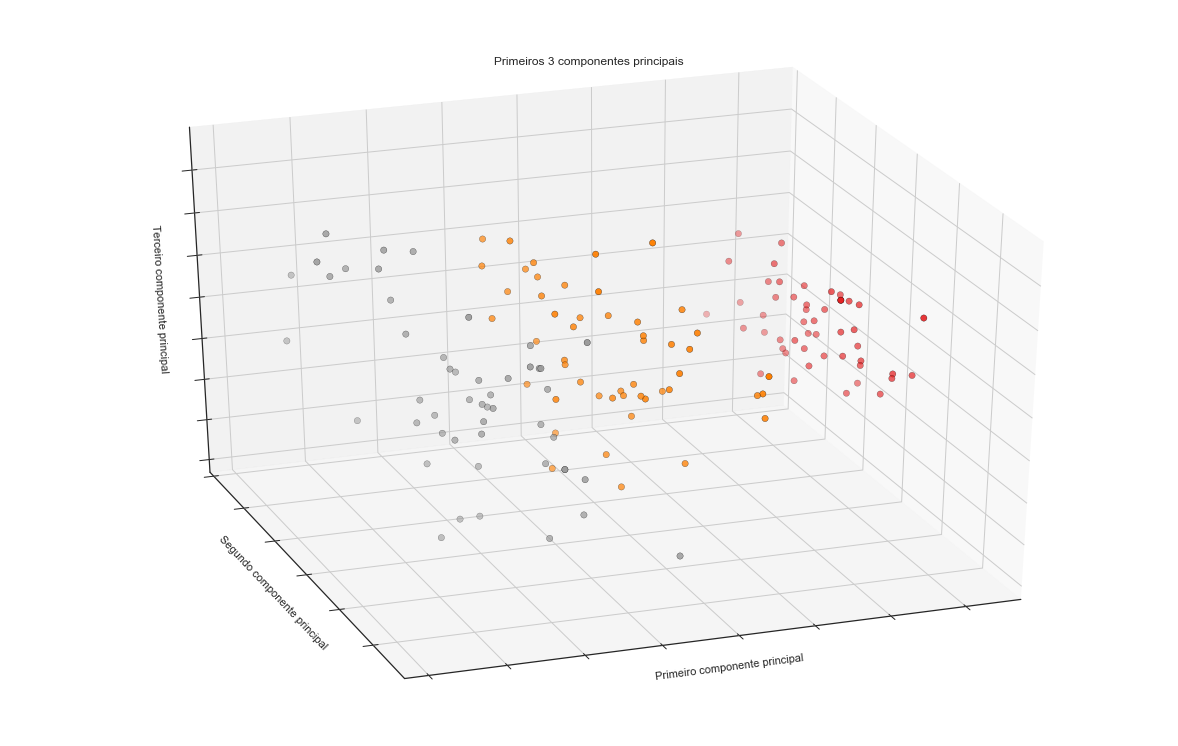

In [47]:
# Podemos também plotar os três primeiros componentes 
# para melhor analisar as relações espaciais
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(16, 10))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=iris.target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Primeiros 3 componentes principais")
ax.set_xlabel("Primeiro componente principal")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Segundo componente principal")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Terceiro componente principal")
ax.w_zaxis.set_ticklabels([])
plt.show()

Podemos perceber que os dois primeiros componentes principais já nos mostram uma boa separação entre os clusters de espécies de Iris. De fato, podemos perceber que a [dimensão intrínseca](https://en.wikipedia.org/wiki/Intrinsic_dimension) do dataset é 2, ou seja, precisamos apenas de dois atributos (ou variáveis) para descrever bem os nossos dados. Podemos perceber isso ao apresentar o nível de variância explicada por cada um dos primeiros componentes principais obtidos pelo PCA.

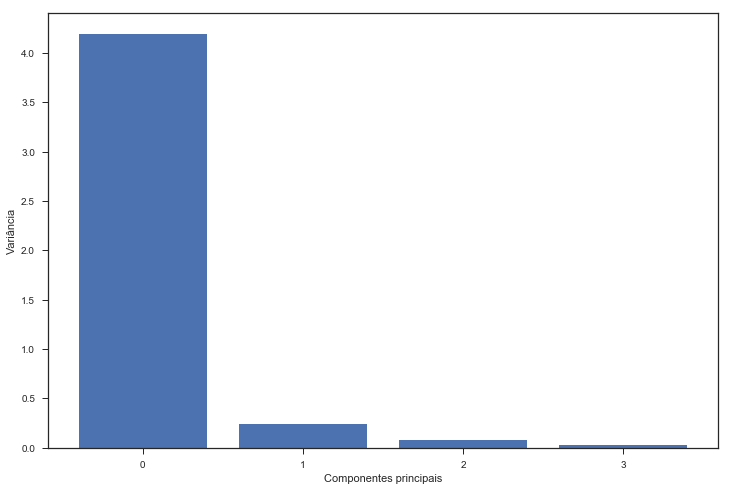

In [57]:
# Componentes principais
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('Componentes principais')
plt.ylabel('Variância')
plt.show()

Podemos ver que os dois primeiros componentes possuem a maior variância e os últimos quase não possuem influência. Isso significa que a maior parte da informação do dataset está contida nos dois primeiros componentes. Podemos ignorar os últimos sem perder qualidade da análise.

### Exercício:

Vamos repetir a análise dos componentes principais do dataset de variedades de grãos de trigo.

A dimensão desse dataset já é maior (d=7) do que o de espécies de Iris. Será que conseguimos reduzir essa dimensão sem perder informações úteis?

In [61]:
# Importar os dados
df_grain = pd.read_csv(os.path.join(DATASET_FOLDER, 'seeds_dataset.csv'), sep=';')
df_grain.head(5)

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry,kernel_groove,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [62]:
# Vamos criar agora o vetor de atributos
X = df_grain[['area','perimeter','compactness','length_kernel','width_kernel','asymmetry','kernel_groove']].values

In [63]:
# Aplique a transformação PCA no vetor de atributos
X_pca = _

In [64]:
# Vamos utilizar o LabelEncoder do scikit-learn 
# para transformar as variedades de grão em valores numéricos
# Útil para utilizar no gráfico de cores
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Variedades
varieties = df_grain['varieties'].values

# Codifica em valores numéricos
varieties_num = label_encoder.fit_transform(varieties)

In [ ]:
# Vamos plotar os resultados dos dois primeiros componentes
plt.figure(figsize=(16,10))
plt.scatter(_, _, c=_, cmap=plt.cm.Set1)
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')
plt.grid()
plt.show()

In [ ]:
# Podemos também plotar os três primeiros componentes 
# para melhor analisar as relações espaciais
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(16, 10))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(_, _, _, c=_,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Primeiros 3 componentes principais")
ax.set_xlabel("Primeiro componente principal")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Segundo componente principal")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Terceiro componente principal")
ax.w_zaxis.set_ticklabels([])
plt.show()

Qual é a dimensão intrínseca do problema? Plote o gráfico de barras da variância explicada por cada componente principal e tire suas conclusões.

In [ ]:
# Gráfico de variância explicada


Qual é a conclusão?

---
## T-SNE

T-SNE é um algoritmo de machine learning iterativo que procura mapear regiões multidimensionais em 2 ou 3 dimensões. O resultado gerado pelo método é um mapa de dispersão na qual os pontos com maior afinidade estão próximos, enquanto os pontos dissimilares ficam distantes. Note que os eixos não têm necessariamente um significado predeterminado. Não podemos calcular distâncias entre pontos a partir do resultado do T-SNE.

Vamos testar com o dataset de espécie de Iris.

In [101]:
# Importe o dataset
from sklearn.datasets import load_iris

iris = load_iris()

In [102]:
# Vamos agora importar o método T-SNE do scikit-learn
from sklearn.manifold import TSNE

# Criemos agora a instância do T-SNE
tsne = TSNE(learning_rate=100, perplexity=30)

# Basta apenas transformar os dados
X_tsne = tsne.fit_transform(iris.data)

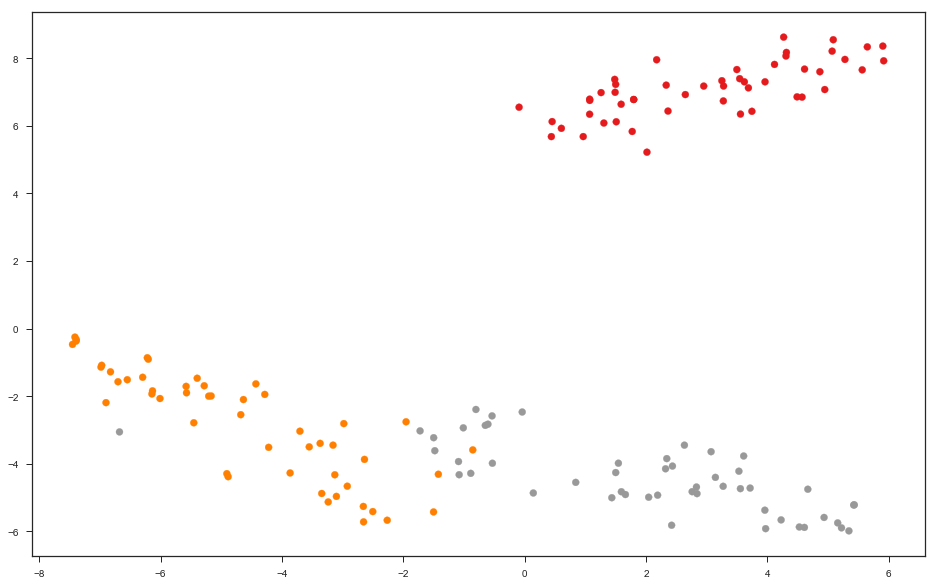

In [103]:
# Agora basta plotar o resultado
plt.figure(figsize=(16,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap=plt.cm.Set1)
plt.show()

Repita o T-SNE algumas vezes com valores diferentes de `learning_rate` e `perplexity` para visualizar resultados diferentes.

### Exercício

Vamos utilizar o T-SNE para visualizar a distribuição do dataset de variedades de grãos de trigo.

In [73]:
# Importar os dados
df_grain = pd.read_csv(os.path.join(DATASET_FOLDER, 'seeds_dataset.csv'), sep=';')
df_grain.head(5)

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry,kernel_groove,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [74]:
# Vamos criar agora o vetor de atributos
X = df_grain[['area','perimeter','compactness','length_kernel','width_kernel','asymmetry','kernel_groove']].values

In [75]:
# Vamos utilizar o LabelEncoder do scikit-learn 
# para transformar as variedades de grão em valores numéricos
# Útil para utilizar no gráfico de cores
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Variedades
varieties = df_grain['varieties'].values

# Codifica em valores numéricos
varieties_num = label_encoder.fit_transform(varieties)

In [ ]:
# Execute o T-SNE
# Criemos agora a instância do T-SNE
# Teste diferentes valores de learning_rate e perplexity
tsne = _

# Transforme os dados
X_tsne = _

# Agora basta plotar o resultado
plt.figure(figsize=(16,10))
plt.scatter(_, _, c=_, cmap=plt.cm.Set1)
plt.show()

---
## Clustering em NLP

Vamos praticar a aplicação de algoritmos de clustering para NLP. Nada melhor para entender algo do que fazendo, então vamos lá!

O dataset que vamos utilizar foi retirado desse [link](https://blog.lateral.io/2015/06/the-unknown-perils-of-mining-wikipedia/). O dataset original contém 463 mil páginas do Wikipedia de diversos temas. Para não ficarmos o dia inteiro processando os dados, foram retirados apenas 58 artigos de classes bem definidas (por exemplo, futebol, música, internet etc). Vamos analisar o dataset:

In [1000]:
# Abra o dataset
df_wiki = pd.read_csv(os.path.join(DATASET_FOLDER, 'wikipedia_dataset_60.csv'), sep=',', names=['titulo', 'artigo', 'cluster'])

df_wiki.head(5)

,titulo,artigo,cluster
0,Black Sabbath,"Black Sabbath are an English rock band, formed...",Music
1,Lymphoma,Lymphoma is a type of blood cancer that occurs...,Sickness
2,Hepatitis C,Hepatitis C is an infectious disease affecting...,Sickness
3,HTTP cookie,"A cookie, also known as an HTTP cookie, web co...",Internet
4,Global warming,Global warming is the rise in the average temp...,Global_Warming


A coluna de clusters foi feita de maneira a facilitar nosso entendimento sobre o resultado final do algoritmo. Na maioria dos casos nós não teremos esse entendimento antes de realizar uma primeira análise (clustering) dos algoritmos.

In [1004]:
# Número aproximado de clusters
n_clusters = len(pd.unique(df_wiki['cluster']))
n_clusters

6

In [265]:
# Exemplo de um artigo:
print(df_wiki[df_wiki.titulo=='Black Sabbath']['artigo'].values)

[ 'Black Sabbath are an English rock band, formed in Birmingham in 1968, by guitarist Tony Iommi, bassist Geezer Butler, singer Ozzy Osbourne, and drummer Bill Ward. The band has since experienced multiple line-up changes, with Tony Iommi the only constant presence in the band through the years. Originally formed in 1968 as a heavy blues rock band named Earth, the band began incorporating occult themes with horror-inspired lyrics and tuned-down guitars. Despite an association with occult and horror themes, Black Sabbath also composed songs dealing with social instability, political corruption, the dangers of drug abuse and apocalyptic prophecies of the horrors of war. Osbourne\'s heavy drug use led to his dismissal from the band in 1979. He was replaced by former Rainbow vocalist Ronnie James Dio. After a few albums with Dio\'s vocals and songwriting collaborations, Black Sabbath endured a revolving line-up in the 1980s and \'90s that included vocalists Ian Gillan, Glenn Hughes, Ray Gi

Cada linha do nosso dataframe representa um documento. Nós precisamos codificar (criar embedding) cada um desses documentos conforme a distribuição das palavras existentes dentro deles. Cada coluna representa uma palavra específica e os valores dentro dessa matriz são os pesos dados para uma determinada palavra dentro de um documento específico. Existem várias formas de definir esses pesos, mas comumente se adota o método [Tf-Idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) (Term frequency - Inverse of document frequency). Vamos aplicar essa transformação nos nossos dados

In [994]:
# Importe o método TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Crie o vetor de embeddings Tf-Idf
# Vamos definir o número máximo de palavras do nosso dicionário (número de dimensões)
# igual a 15000. 
# Também utilizamos um corte em termos muito frequentes em um dado
# documento: max_df=0.8
# O parâmetro sublinear_tf utiliza a função 1+log(tf) em vez de uma função linear
# para calcular o peso da frequência de cada termo. Isso permite uma função mais "suave"
# use_idf: Utiliza o inverso da frequência do documento para recriar os pesos da matriz
tfidf = TfidfVectorizer(max_df=0.8, max_features=15000, sublinear_tf=True, use_idf=True)

# Precisamos extrair os artigos e títulos do dataframe
titles = df_wiki['titulo'].values
articles = df_wiki['artigo'].values

# Aplique a transformação nos artigos
X = tfidf.fit_transform(articles)

# Tamanho do dataset
X.shape

(58, 15000)

Como temos 15000 dimensões, nós podemos ter problemas com a tal da maldição da dimensionalidade. Além disso, a probabilidade de cada uma das palavras estar dentro de todos os documentos é muito baixa. Ou seja, a matriz de features é muito esparsa. Isso nos dá um indício forte para acreditar que teremos grandes vantagens se utilizarmos uma técnica para reduzir a dimensionalidade.



In [ ]:
# Vamos agora importar o método T-SNE do scikit-learn
from sklearn.manifold import TSNE

from sklearn.preprocessing import LabelEncoder 

# Criemos agora a instância do T-SNE
tsne = TSNE(learning_rate=5)

# Basta apenas transformar os dados
X_tsne = tsne.fit_transform(X.toarray())

# Transforma cada tipo de cluster em números de 0 a 5
baseline_clusters = LabelEncoder().fit_transform(df_wiki['cluster'].values)

# Apresenta o resultado do T-SNE de duas dimensões com as cores
# indicando cada um dos clusters pré-definidos
plt.figure(figsize=(16,10))
for i in range(X_tsne.shape[0]):
    plt.scatter(X_tsne[i, 0], 
                X_tsne[i, 1], 
                c=plt.cm.Set1.colors[baseline_clusters[i]], 
                cmap=plt.cm.Set1)
    plt.annotate(titles[i], 
                 ((X_tsne[i, 0], X_tsne[i, 1])),
                 xytext=(4, 3), 
                 textcoords='offset points')

plt.grid()
plt.show()

Podemos perceber que os clusters estão bem separados nos dados. Isso nos dá uma boa indicação de que podemos aplicar métodos de clustering. Percebemos ainda que há uma possibilidade grande de obtermos vantagens ao reduzirmos a dimensionalidade do conjunto de dados.

Vamos agora utilizar o método [`TruncatedSVD`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) do scikit-learn para realizar a redução de dimensionalidade. Esse método é semelhante ao PCA. De fato, ele é equivalente ao PCA se subtrairmos a média dos dados.

In [ ]:
# Importe o método TruncatedSVD (~PCA)
from sklearn.decomposition import TruncatedSVD


# Vamos utilizar o TruncatedSVD para reduzir a dimensionalidade
# do dataset.
# Podemos limitar o número de components para ser igual ao número
# de dados: 58
# Desse modo temos uma matriz quadrada
svd = TruncatedSVD(n_components=58)

# Aplique o método SVD
X_svd = svd.fit_transform(X)

# Vamos ver como ficou o novo tamanho
X_svd.shape

É uma redução bastante drástica! Reduzimos de 15000 dimensões para apenas 58. Será que perdemos muita informação? Vamos verificar o gráfico de variância explicada.

In [ ]:
# Vamos verificar os componentes principais obtidos
features = range(X_svd.shape[1])
plt.bar(features, np.sort(svd.explained_variance_ratio_)[::-1])
plt.show()

# Variância explicada com dimensão 58:
print("Porcentagem explicada: {:.2f}".format(svd.explained_variance_ratio_.sum()))

Podemos perceber que a variância explicada pelos componentes decresce em função da dimensão, como era esperado. Podemos ainda perceber que seria possível reduzir ainda mais o número de dimensões, mas vamos manter assim, por enquanto.

Agora é a hora de verificar se conseguimos encontrar clusters. Escolha algum algoritmo (ou alguns) e veja se consegue achar algum padrão nos artigos.

In [ ]:
# Importe os módulos necessários para realizar clustering
_

# Escolha o algoritmo de clustering que usará para a análise
clust_alg = _

# Treine o modelo com os dados de treino X_svd
_

# O KMeans possui o método predict, mas outros podem não ter
# Os outros possuem o atributo labels_
if hasattr(clust_alg, 'labels_'):
    labels = clust_alg.labels_
else:
    labels = clust_alg.predict(X_svd)

Agora vamos observar o resultado dos clusters!

In [ ]:
# Cria o novo dataframe com os labels dos clusters
df = pd.DataFrame({'label': labels, 'article': titles})

# Apresenta os resultados
print(df.sort_values(by='label'))

E aí? Achou que fez sentido?

Como temos uma relação de clusters pré-definidos (por simplificação), podemos apresentar a matriz de tabulação.

In [ ]:
ct = pd.crosstab(labels, df_wiki['cluster'])
print(ct)